In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

%cd ../..

!hostname

/p/fastdata/pli/Private/oberstrass1/datasets/vervet1818-3d
jrlogin12.jureca


In [2]:
import os

import re
import pandas as pd
import numpy as np

import pli
import pli.image as im

from tqdm import tqdm

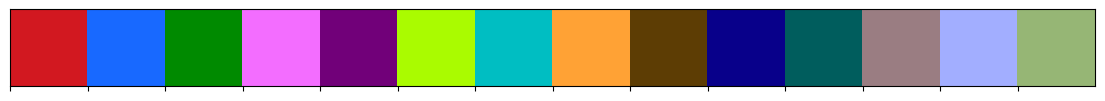

In [10]:
n_cluster = [3, 7, 14]

mask_color = (0, 0, 0, 0)

###

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import glasbey
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

color_palette = glasbey.create_palette(palette_size=n_cluster[-1])

cmap_max = n_cluster[-1]

# Get the colormap values as tuples with alpha channel
colors = (np.array([mask_color] + [ mcolors.to_rgba(color_palette[i]) for i in range(cmap_max)]) * 255).astype(np.uint8)

sns.palplot(color_palette)

In [16]:
cluster_paths = {
    3: "data/aa/clusters/agglomerative_3/resnet50_planes8_962-1083_sphere_small/Agglomerative_3_s0898.h5",
    7: "data/aa/clusters/agglomerative_7/resnet50_planes8_962-1083_sphere_small/Agglomerative_7_s0898.h5",
    14 : "data/aa/clusters/agglomerative_14/resnet50_planes8_962-1083_sphere_small/Agglomerative_14_s0898.h5",
}

out_paths = {
    3: "data/aa/clusters/agglomerative_3/resnet50_planes8_962-1083_sphere_small/overlay/Agglomerative_3_s0898.h5",
    7: "data/aa/clusters/agglomerative_7/resnet50_planes8_962-1083_sphere_small/overlay/Agglomerative_7_s0898.h5",
    14 : "data/aa/clusters/agglomerative_14/resnet50_planes8_962-1083_sphere_small/overlay/Agglomerative_14_s0898.h5",
}

###

from pli.data import Section
import matplotlib.pyplot as plt
import h5py as h5

for k in cluster_paths.keys():

    with h5.File(cluster_paths[k], 'r') as f:
        cluster = f['Image'][:]
        spacing = f['Image'].attrs['spacing']

        current_data = cluster.copy()

        colored_cluster = colors[cluster]

    rgb_image = colors[cluster]
    rgb_image = np.roll(rgb_image, (-1, -1), axis=(0, 1))
    rgb_image = rgb_image.swapaxes(0, 1)[:, ::-1]

    section = Section(image=rgb_image)
    section.spacing = spacing
    section.origin = (0, 0)
    section.modality = 'Mask'
    section.to_hdf5(out_paths[k], num_levels=6, compression='lzf', overwrite=True)

    print(out_paths[k])

data/aa/clusters/agglomerative_3/resnet50_planes8_962-1083_sphere_small/overlay/Agglomerative_3_s0898.h5
data/aa/clusters/agglomerative_7/resnet50_planes8_962-1083_sphere_small/overlay/Agglomerative_7_s0898.h5
data/aa/clusters/agglomerative_14/resnet50_planes8_962-1083_sphere_small/overlay/Agglomerative_14_s0898.h5


/p/home/jusers/oberstrass1/jureca/project/miniconda3/envs/pli/lib/python3.9/site-packages/atlaslib/image.py:497: UserWarning: level 0 is already located in pyramid path. Not linking again.
  warnings.warn("level 0 is already located in pyramid path. Not linking again.")


In [15]:
plt.imshow(rgb_image)

dict_keys([3, 7, 14])